<a href="https://colab.research.google.com/github/ac547/Explainable-AI/blob/main/Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Problem

By December of 2020, approxmately two million people have died from Covid-19 due to the Pneumonia-like symptoms in combination with immune system reactions to it and complications of pre-existing conditions. 

There is a need to develop AI systems that can help diagnose Covid-19 cases, and since medical diagnoses are critical and highly sensitive, these systems need to be explainable and compliant with healthcare regulations. After all, we want doctors to be able to explain how a condition is diagnosed. 

As evidenced by governments and organizations that were not properly prepared for a pandemic of such magnitude, access to testing, Personal Protective Equipment, and treatment remain a challenge even amongst developed nations. Therefore, there have been numerous attempts at applying machine learning to aid in the diagnosis and prognosis of Covid-19 patients. X-Rays are relatively inexpensive and readily available even in remote or rural communities where the standard (RT-PCR) test kits are not readily available or in low supply. This sets the stage for the application of computer vision based classifiers such as Convolutional Neural Networks.

However, some institutions are weary of using "Blackbox" algorithms to diagnose medical conditions. Deep Nerual Networks such as the ones found in computer vision algorithms are intrinsically complicated and it is not always clear what is happening under the hood. Fortunately, "explainability" of AI systems is a popular research topic.

In this project, I will train a deep convolutional neural network agent to classify chest X-rays, and apply the Local Interpretable Model-Agnostic Explanations (LIME) method to exaplain how the algorithm is making its decisions.

Then, I will explore an alternative explainability method that unifies earlier explainability approaches and is supported by the game theory research of American Mathematician Lloyd Shapley (SHAP.)  

## Setup and Environment


I have created a Shared Drive as a working directory and it needs to be mounted into this runtime.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI

/content/gdrive/Shareddrives/Interpretable_AI


Next, I will create a directory in which to store my data.

In [ ]:
!mkdir covid-cxr
!mkdir covid-cxr/RAW_DATA

mkdir: cannot create directory ‘covid-cxr’: File exists
mkdir: cannot create directory ‘covid-cxr/RAW_DATA’: File exists


## The Data

For this project, I have used:

A dataset collected by Joseph Paul Cohen at the Mila, University of Montreal. 

https://github.com/ieee8023/covid-chestxray-dataset

**From the Abstract:**
"A public open dataset of chest X-ray and CT images of patients which are positive or suspected of COVID-19 or other viral and bacterial pneumonias." 

A dataset collected by 

DarwinAI Corp., Canada and Vision and Image Processing Research Group, University of Waterloo, Canada

https://github.com/agchung/Figure1-COVID-chestxray-dataset

For Covid-19 related research.

And finally the  RSNA Pneumonia Detection Challenge dataset from Kaggle

https://www.kaggle.com/c/rsna-pneumonia-detection-challenge


Next, I will get the data from the respective GitHub repos and the Kaggle Competition site.

Now we will create a folder in which to store our Raw Data.

In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/

! git clone https://github.com/ieee8023/covid-chestxray-dataset # Figure1
! git clone https://github.com/agchung/Figure1-COVID-chestxray-dataset # Mila

/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA


Next, we need to modify the congif.yml file in so that the PATHS points to the directory we have created and the raw data will reside. 

This can be done manually by editing the text file or if you are working from a command line, you can use:

>> sudo vim config.yml

this will open a text editor, hit "i" on the keyboard, make the changes, hit "esc" on the keyboard, type :wq and hit "Enter" key.

The PATHS should look something like:

PATHS:

  RAW_DATA: '/content/gdrive/Shareddrives/Covid-CXR/covid-cxr/RAW_DATA/'              # Path containing all 3 raw datasets (Mila, Figure 1, RSNA)

  MILA_DATA: '/content/gdrive/Shareddrives/Covid-CXR/covid-cxr/RAW_DATA/covid-chestxray-dataset/'              # Path of Mila dataset https://github.com/ieee8023/covid-chestxray-dataset

  FIGURE1_DATA: '/content/gdrive/Shareddrives/Covid-CXR/covid-cxr/RAW_DATA/Figure1-COVID-chestxray-dataset/'   # Path of Figure 1 dataset https://github.com/agchung/Figure1-COVID-chestxray-dataset
  
  RSNA_DATA: '/content/gdrive/Shareddrives/Covid-CXR/covid-cxr/RAW_DATA/rsna/'   

Then we go into the RAW_DATA directory and start cloning our data from Github.

We start with the **Figure 1 COVID-19 Chest X-ray Dataset**

In [ ]:
%cd /content/gdrive/Shareddrives/Covid-CXR/covid-cxr/RAW_DATA/

! git clone https://github.com/agchung/Figure1-COVID-chestxray-dataset

/content/gdrive/Shareddrives/Covid-CXR/covid-cxr/RAW_DATA
fatal: destination path 'Figure1-COVID-chestxray-dataset' already exists and is not an empty directory.


Next, we clone the **Covid Chest X-Ray Data Set**

In [ ]:
! git clone https://github.com/ieee8023/covid-chestxray-dataset

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3614 (delta 7), reused 11 (delta 5), pack-reused 3599
Receiving objects: 100% (3614/3614), 633.00 MiB | 25.44 MiB/s, done.
Resolving deltas: 100% (1431/1431), done.
Checking out files: 100% (1173/1173), done.


Finally, we need to get the data from the RSNA Pneumonia Detection Challenge in Kaggle.

Make sure you register for the competition and accept the terms, go into your account API management and create a new token, download the token into your local machine and:

In [ ]:
from google.colab import files
files.upload() #Upload your kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrescastellano","key":"e6f9b4ce2e6e5edfd14cdfb4389b08c8"}'}

In [ ]:
! pip install -q kaggle 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-cp36-none-any.whl size=73265 sha256=4c860dd531377151ed4c24269eaee4156c09b767b5eb3c68844da9415140e12e
  Stored in directory: /root/.cache/pip/wheels/68/6d/9b/7a98271454edcba3b56328cbc78c037286e787d004c8afee71
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [ ]:
! mkdir rsna
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/rsna

mkdir: cannot create directory ‘rsna’: File exists
/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/rsna


In [ ]:
! kaggle competitions download -c rsna-pneumonia-detection-challenge --force

100% 3.65G/3.66G [01:08<00:00, 39.5MB/s]
100% 3.66G/3.66G [01:08<00:00, 57.3MB/s]


In [ ]:
!ls

kaggle.json  rsna  rsna-pneumonia-detection-challenge.zip


In [ ]:
! unzip rsna-pneumonia-detection-challenge.zip

## Data Cleaning and Preprocessing

Let's build a dataset with consistent characteristics from our three different data sources.

First, let's define the project configuration file


In [ ]:
import os
! pip install pyyaml==5.2
import yaml

     |████████████████████████████████| 266kB 7.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.2-cp36-cp36m-linux_x86_64.whl size=44210 sha256=09af711f04047de18ab7dc7fcfe1a210af69a6d5c5a1c551d09c566d928782bd
  Stored in directory: /root/.cache/pip/wheels/54/b7/c7/2ada654ee54483c9329871665aaf4a6056c3ce36f29cf66e67
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/
cfg = yaml.full_load(open('/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/config.yml', 'r'))

/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr


In [ ]:
%cd /content/gdrive/Shareddrives/Covid-CXR/covid-cxr

/content/gdrive/Shareddrives/Covid-CXR/covid-cxr


Let's start by creating a dataframe from each of the original datasets.

### MILA

Let's take a look at what is inside the MILA data.

In [ ]:
%cd RAW_DATA/covid-chestxray-dataset/
!ls

/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/covid-chestxray-dataset
annotations  images	   README.md	     SCHEMA.md	tests
docs	     metadata.csv  requirements.txt  scripts	volumes


In [ ]:
import pandas as pd

mila = cfg['PATHS']['MILA']
mila_df = pd.read_csv('metadata.csv')
mila_df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
mila_df['filename'] = mila.split('/')[-2] + '/images/' + mila_df['filename'].astype(str)
mila_df['filename'][1]

'covid-chestxray-dataset/images/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg'

In [ ]:
mila_df['view'].value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64

In radiography, AP stands for anterioposterior (front to back) and PA stands for posteroanterior (back to front). For the purpose of this project, I will stick to these two views, adding other views will increase model complexity. It is possible that we will have to stick to only one view so I will create a setting in the configuration file for the desired views.

> IMAGES[link text](https://): [VIEWS]['PA','AP']

In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/
cfg = yaml.full_load(open("config.yml", 'r'))
%cd RAW_DATA/covid-chestxray-dataset/


/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr
/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/covid-chestxray-dataset


In [ ]:
mila_views_df = (mila_df['view'].str.contains('|'.join(cfg['IMAGES']['VIEWS'])))

In [ ]:
mila_views_df.value_counts()

True     782
False    168
Name: view, dtype: int64

In [ ]:
mila_df['finding'].value_counts() # Check values of 'finding'

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [ ]:
mila_covid_df = (mila_df['finding']=='Pneumonia/Viral/COVID-19') # Select only cases attributed to Covid-19

In [ ]:
mila_covid_df.value_counts()

True     584
False    366
Name: finding, dtype: int64

In [ ]:
mila_covid_views_df = mila_df[mila_covid_df & mila_views_df] # Creates dataframe of images of patients diagnosed with Covid-19

In [ ]:
mila_covid_views_df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,covid-chestxray-dataset/images/auntminnie-a-20...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,covid-chestxray-dataset/images/auntminnie-b-20...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,covid-chestxray-dataset/images/auntminnie-c-20...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,covid-chestxray-dataset/images/auntminnie-d-20...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,covid-chestxray-dataset/images/nejmc2001573_f1...,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
mila_covid_views_df['label'] = 1 # Adds a label to Mila images
mila_other_views_df = mila_df[~mila_covid_df & mila_views_df] 
mila_other_views_df['label'] = 0 # Adds a label to Mila images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
mila_other_views_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 6 to 948
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               304 non-null    object 
 1   offset                  221 non-null    float64
 2   sex                     287 non-null    object 
 3   age                     202 non-null    float64
 4   finding                 304 non-null    object 
 5   RT_PCR_positive         15 non-null     object 
 6   survival                144 non-null    object 
 7   intubated               47 non-null     object 
 8   intubation_present      48 non-null     object 
 9   went_icu                131 non-null    object 
 10  in_icu                  121 non-null    object 
 11  needed_supplemental_O2  13 non-null     object 
 12  extubated               5 non-null      object 
 13  temperature             10 non-null     float64
 14  pO2_saturation          18 non-null     fl

### FIGURE 1

A closer look at Figure 1 data.

In [ ]:
fig1 = cfg['PATHS']['FIGURE1']
os.getcwd()

'/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/covid-chestxray-dataset'

In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/Figure1-COVID-chestxray-dataset/
!ls

/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA
/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/Figure1-COVID-chestxray-dataset
images	metadata.csv  README.md


In [ ]:
fig1_df = pd.read_csv('metadata.csv', encoding ='ISO-8859-1')
fig1_df.head()

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes
0,COVID-00001,13.0,M,33,COVID-19,NaN,NaN,58,AP erect,X-ray,NaN,O2 saturation was initially 58% on room air an...
1,COVID-00002,NaN,M,50+,NaN,NaN,NaN,NaN,AP erect,X-ray,NaN,"50+ male patient, asthmatic, returning from a ..."
2,COVID-00003a,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,"28M previously fit and well, not on any regula..."
3,COVID-00003b,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,Post-intubation in the critical care setting
4,COVID-00004,2.0,M,42,COVID-19,NaN,NaN,91-92,PA,X-ray,NaN,42 year old male patient presented to ED with ...


In [ ]:
fig1_df['filename'] = '' # Does not have a filename column, we create one.
fig1_df.head()

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes,filename
0,COVID-00001,13.0,M,33,COVID-19,NaN,NaN,58,AP erect,X-ray,NaN,O2 saturation was initially 58% on room air an...,
1,COVID-00002,NaN,M,50+,NaN,NaN,NaN,NaN,AP erect,X-ray,NaN,"50+ male patient, asthmatic, returning from a ...",
2,COVID-00003a,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,"28M previously fit and well, not on any regula...",
3,COVID-00003b,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,Post-intubation in the critical care setting,
4,COVID-00004,2.0,M,42,COVID-19,NaN,NaN,91-92,PA,X-ray,NaN,42 year old male patient presented to ED with ...,


In [ ]:
fig1_df.count()

patientid               55
offset                  20
sex                     22
age                     29
finding                 40
survival                 0
temperature              4
pO2 saturation          12
view                    18
modality                55
artifacts/distortion     7
notes                   48
filename                55
dtype: int64

In [ ]:
%cd images

/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/Figure1-COVID-chestxray-dataset/images


In [ ]:
!ls

COVID-00001.jpg   COVID-00013b.jpg  COVID-00026.jpg   COVID-00039b.jpg
COVID-00002.jpg   COVID-00014.jpg   COVID-00027.jpg   COVID-00039c.jpg
COVID-00003a.jpg  COVID-00015a.png  COVID-00028.jpg   COVID-00040a.jpg
COVID-00003b.jpg  COVID-00015b.png  COVID-00029.jpg   COVID-00040b.jpg
COVID-00004.jpg   COVID-00016.jpg   COVID-00030.jpg   COVID-00041.jpg
COVID-00005.jpg   COVID-00017.jpg   COVID-00031.jpg   COVID-00042.jpg
COVID-00006.jpg   COVID-00018.jpg   COVID-00032.jpg   COVID-00043a.jpg
COVID-00007.jpg   COVID-00019.jpg   COVID-00033.jpg   COVID-00043b.jpg
COVID-00008.jpg   COVID-00020.jpg   COVID-00034.jpg   COVID-00044.jpg
COVID-00009.jpg   COVID-00021.jpg   COVID-00035.jpg   COVID-00045.png
COVID-00010.jpg   COVID-00022.jpg   COVID-00036.jpg   COVID-00046.png
COVID-00011.jpg   COVID-00023.jpg   COVID-00037.jpg   COVID-00047.jpg
COVID-00012.jpg   COVID-00024.jpg   COVID-00038.jpg   COVID-00048.png
COVID-00013a.jpg  COVID-00025.jpg   COVID-00039a.jpg


We need to add a filename associated with each record, but some of the images are jpg and others are png so we need to check each record individually.

In [ ]:
for i, row in fig1_df.iterrows():
        if os.path.exists(fig1 + 'images/' + fig1_df.loc[i, 'patientid'] + '.jpg'):
            fig1_df.loc[i, 'filename'] = fig1.split('/')[-2] + '/images/' + fig1_df.loc[i, 'patientid'] + '.jpg'
        else:
            fig1_df.loc[i, 'filename'] = fig1.split('/')[-2] + '/images/' + fig1_df.loc[i, 'patientid'] + '.png'
fig1_df.head()

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes,filename
0,COVID-00001,13.0,M,33,COVID-19,NaN,NaN,58,AP erect,X-ray,NaN,O2 saturation was initially 58% on room air an...,Figure1-COVID-chestxray-dataset/images/COVID-0...
1,COVID-00002,NaN,M,50+,NaN,NaN,NaN,NaN,AP erect,X-ray,NaN,"50+ male patient, asthmatic, returning from a ...",Figure1-COVID-chestxray-dataset/images/COVID-0...
2,COVID-00003a,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,"28M previously fit and well, not on any regula...",Figure1-COVID-chestxray-dataset/images/COVID-0...
3,COVID-00003b,8.0,M,28,NaN,NaN,39.1,90,AP erect,X-ray,NaN,Post-intubation in the critical care setting,Figure1-COVID-chestxray-dataset/images/COVID-0...
4,COVID-00004,2.0,M,42,COVID-19,NaN,NaN,91-92,PA,X-ray,NaN,42 year old male patient presented to ED with ...,Figure1-COVID-chestxray-dataset/images/COVID-0...


In [ ]:
fig1_df['view'].value_counts()

AP erect    11
AP           4
PA           3
Name: view, dtype: int64

There are some missing records for the image view, but we know from the dataset description that every image in this set is either PA or AP. We replace the missing values with "PA or AP"

In [ ]:
fig1_df['view'].fillna('PA or AP', inplace=True) 
fig1_df['view'].value_counts()

PA or AP    37
AP erect    11
AP           4
PA           3
Name: view, dtype: int64

In [ ]:
fig1_views_df = (fig1_df['view'].str.contains('|'.join(cfg['IMAGES']['VIEWS'])))
fig1_views_df.value_counts() # Selects the desired views based on project config.

True    55
Name: view, dtype: int64

In [ ]:
fig1_df['finding'].value_counts() # Check values of 'finding'

COVID-19      35
No finding     3
Pneumonia      2
Name: finding, dtype: int64

In [ ]:
fig1_covid_df = (fig1_df['finding']=='COVID-19') # Select only cases attributed to Covid-19
fig1_covid_df.value_counts()

True     35
False    20
Name: finding, dtype: int64

In [ ]:
fig1_covid_views_df = fig1_df[fig1_covid_df & fig1_views_df] # Creates dataframe of images of patients diagnosed with Covid-19
fig1_covid_views_df.head()

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,view,modality,artifacts/distortion,notes,filename
0,COVID-00001,13.0,M,33,COVID-19,NaN,NaN,58,AP erect,X-ray,NaN,O2 saturation was initially 58% on room air an...,Figure1-COVID-chestxray-dataset/images/COVID-0...
4,COVID-00004,2.0,M,42,COVID-19,NaN,NaN,91-92,PA,X-ray,NaN,42 year old male patient presented to ED with ...,Figure1-COVID-chestxray-dataset/images/COVID-0...
6,COVID-00006,5.0,F,57,COVID-19,NaN,NaN,NaN,PA or AP,X-ray,Some from monitor,57 year old female. Returning from Texas March...,Figure1-COVID-chestxray-dataset/images/COVID-0...
8,COVID-00008,4.0,M,47,COVID-19,NaN,NaN,92,AP erect,X-ray,"Some from monitor, dust specks, cropped out mo...","47 Male, BMI 34, sleep apnea and childhood ast...",Figure1-COVID-chestxray-dataset/images/COVID-0...
9,COVID-00009,NaN,NaN,NaN,COVID-19,NaN,NaN,NaN,PA or AP,X-ray,"Some from monitor, oversaturation at bottom",CXray during worsening corona infection,Figure1-COVID-chestxray-dataset/images/COVID-0...


In [ ]:
fig1_covid_views_df['label'] = 1 
file_df = pd.concat([mila_covid_views_df[['filename', 'label']], mila_other_views_df[['filename', 'label']],
                     fig1_covid_views_df[['filename', 'label']]], axis=0)

file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 54
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  817 non-null    object
 1   label     817 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 19.1+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### RSNA

Data from the Kaggle Competition


In [ ]:
rsna = cfg['PATHS']['RSNA']
os.getcwd()

'/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/Figure1-COVID-chestxray-dataset/images'

In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/RAW_DATA/rsna/
!ls

In [ ]:
rsna_df = pd.read_csv('stage_2_train_labels.csv')
rsna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


There are almost 10 thousand non null entries on this dataset. This is a lot larger than the data collected from the two previous sources. Here we need to make a decision of how much of this data we want to use to avoid a class imbalance. Here I will use 1000, but I will create a field in the config.yml file so this can be easily changed later.

In [ ]:
cfg = yaml.full_load(open('/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/config.yml', 'r'))
num_rsna_imgs = cfg['IMAGES']['NUM_RSNA_IMGS']
num_rsna_imgs

1000

In [ ]:
rsna_df['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

Now we need to select those instances marked as pneumonia or normal.

In [ ]:
rsna_normal_df = rsna_df[rsna_df['Target'] == 0] # Normal
rsna_pneum_df = rsna_df[rsna_df['Target'] == 1] # pneumonia
rsna_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20672 entries, 0 to 30224
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  20672 non-null  object 
 1   x          0 non-null      float64
 2   y          0 non-null      float64
 3   width      0 non-null      float64
 4   height     0 non-null      float64
 5   Target     20672 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


The images in the RSNA dataset are dicom files that need to be converted to jpg. Since we have two different dataframes for Penumonia and No Finding classes, let's consider writing a function for this task.



In [ ]:
%cd /content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/
!mkdir source
%cd source
!pwd

/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr
mkdir: cannot create directory ‘source’: File exists
/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/source
/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/source


In [ ]:
%%writefile dicom_to_jpg.py

def dicom_to_jpg(n=int, df=object, cfg=[]):
  
  ''' This function iterates over a dataframe of image metadata and converts
  the file types from dicom to JPG. It takes a metadata dataframe, the number of
  images to be processed and the views to be included (Extracted from config.yml).  
  

  Requirements
  ------------

  pydicom==1.4.2

  Parameters
  ------------

  n: int
    number of images to process 
  df: object
    dataframe containing the metadata for the images to be processed.
  cfg: configuration settings
    Extracted from config.yml. includes the image views to be included.
  
  Returns
  ------------

  A dataframe object with n instances of metadata for images converted to jpg from
  the rsna dataset.

  '''

  
  try:
    import pydicom as dicom
  except: 
    !pip install pydicom==1.4.2
    import pydicom as dicom
  import os
  import cv2

  counter = 0
  idxs = []

  for df_idx in df.index.values.tolist():
    filename = df.loc[df_idx]['patientId']
    ds = dicom.dcmread(os.path.join(rsna + 'stage_2_train_images/' + filename + '.dcm'))
    if any(view in ds.SeriesDescription.split(' ')[1] for view in cfg['IMAGES']['VIEWS']):
      if not os.path.exists(rsna + filename + '.jpg'):
        cv2.imwrite(os.path.join(rsna + filename + '.jpg'), ds.pixel_array)
      idxs.append(df_idx)
      counter += 1
    if counter >= n:
      break
  df = df.loc[idxs]
  print(counter,' images were converted.')

  return df


Overwriting dicom_to_jpg.py


In [ ]:
rsna_normal_df = dicom_to_jpg(num_rsna_imgs/2,rsna_normal_df,cfg)

500  images were converted.


In [ ]:
n = num_rsna_imgs - 500 
rsna_pneum_df = dicom_to_jpg(n,rsna_pneum_df,cfg)

500  images were converted.


In [ ]:
rsna_df = pd.concat([rsna_normal_df, rsna_pneum_df], axis=0)
rsna_filenames = rsna.split('/')[-2] + '/' + rsna_df['patientId'].astype(str) + '.jpg'
rsna_file_df = pd.DataFrame({'filename': rsna_filenames, 
                            'label': 0}) 

### Combining the Data



In [ ]:
file_df = pd.concat([file_df, rsna_file_df],
                    axis = 0) # =D
file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1817 entries, 0 to 1169
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1817 non-null   object
 1   label     1817 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 42.6+ KB


### Splitting the Data



In [ ]:
from sklearn.model_selection import train_test_split

cfg = yaml.full_load(open('/content/gdrive/Shareddrives/Interpretable_AI/covid-cxr/config.yml', 'r'))

val_split = cfg['DATA']['VAL_SPLIT']
test_split = cfg['DATA']['TEST_SPLIT']
file_df_train, file_df_test = train_test_split(file_df, test_size=test_split, stratify=file_df['label'])
relative_val_split = val_split / (1 - test_split)  
file_df_train, file_df_val = train_test_split(file_df_train, test_size=relative_val_split,
                                                      stratify=file_df_train['label'])


if not os.path.exists(cfg['PATHS']['PROCESSED_DATA']):
  os.makedirs(cfg['PATHS']['PROCESSED_DATA'])
  file_df_train.to_csv(cfg['PATHS']['TRAIN_SET'])
  file_df_val.to_csv(cfg['PATHS']['VAL_SET'])
  file_df_test.to_csv(cfg['PATHS']['TEST_SET'])


# Models

In [ ]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, MaxPool2D, Conv2D, Flatten, LeakyReLU, BatchNormalization, \
    Activation, concatenate, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.initializers import Constant
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, ResNet101V2
from tensorflow.keras.utils import multi_gpu_model


def dcnn_resnet(model_config, input_shape, metrics, n_classes=2, output_bias=None, gpus=1):
    '''
    Defines a deep convolutional neural network model for multiclass X-ray classification.
    :param model_config: A dictionary of parameters associated with the model architecture
    :param input_shape: The shape of the model input
    :param metrics: Metrics to track model's performance
    :return: a Keras Model object with the architecture defined in this method
    '''

    # Set hyperparameters
    nodes_dense0 = model_config['NODES_DENSE0']
    lr = model_config['LR']
    dropout = model_config['DROPOUT']
    l2_lambda = model_config['L2_LAMBDA']
    if model_config['OPTIMIZER'] == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif model_config['OPTIMIZER'] == 'sgd':
        optimizer = SGD(learning_rate=lr)
    else:
        optimizer = Adam(learning_rate=lr)  # For now, Adam is default option
    init_filters = model_config['INIT_FILTERS']
    filter_exp_base = model_config['FILTER_EXP_BASE']
    conv_blocks = model_config['CONV_BLOCKS']
    kernel_size = eval(model_config['KERNEL_SIZE'])
    max_pool_size = eval(model_config['MAXPOOL_SIZE'])
    strides = eval(model_config['STRIDES'])

    # Set output bias
    if output_bias is not None:
        output_bias = Constant(output_bias)
    print("MODEL CONFIG: ", model_config)

    # Input layer
    X_input = Input(input_shape)
    X = X_input

    # Add convolutional (residual) blocks
    for i in range(conv_blocks):
        X_res = X
        X = Conv2D(init_filters * (filter_exp_base ** i), kernel_size, strides=strides, padding='same',
                         kernel_initializer='he_uniform', activity_regularizer=l2(l2_lambda),
                         name='conv' + str(i) + '_0')(X)
        X = BatchNormalization()(X)
        X = LeakyReLU()(X)
        X = Conv2D(init_filters * (filter_exp_base ** i), kernel_size, strides=strides, padding='same',
                         kernel_initializer='he_uniform', activity_regularizer=l2(l2_lambda),
                         name='conv' + str(i) + '_1')(X)
        X = concatenate([X, X_res], name='concat' + str(i))
        X = BatchNormalization()(X)
        X = LeakyReLU()(X)
        X = MaxPool2D(max_pool_size, padding='same')(X)

    # Add fully connected layers
    X = Flatten()(X)
    X = Dropout(dropout)(X)
    X = Dense(nodes_dense0, kernel_initializer='he_uniform', activity_regularizer=l2(l2_lambda))(X)
    X = LeakyReLU()(X)
    X = Dense(n_classes, bias_initializer=output_bias)(X)
    Y = Activation('softmax', dtype='float32', name='output')(X)

    # Set model loss function, optimizer, metrics.
    model = Model(inputs=X_input, outputs=Y)
    model.summary()
    if gpus >= 2:
        model = multi_gpu_model(model, gpus=gpus)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model


def resnet50v2(model_config, input_shape, metrics, n_classes=2, output_bias=None, gpus=1):
    '''
    Defines a model based on a pretrained ResNet50V2 for multiclass X-ray classification.
    :param model_config: A dictionary of parameters associated with the model architecture
    :param input_shape: The shape of the model input
    :param metrics: Metrics to track model's performance
    :return: a Keras Model object with the architecture defined in this method
    '''

    # Set hyperparameters
    nodes_dense0 = model_config['NODES_DENSE0']
    lr = model_config['LR']
    dropout = model_config['DROPOUT']
    l2_lambda = model_config['L2_LAMBDA']
    if model_config['OPTIMIZER'] == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif model_config['OPTIMIZER'] == 'sgd':
        optimizer = SGD(learning_rate=lr)
    else:
        optimizer = Adam(learning_rate=lr)  # For now, Adam is default option

    # Set output bias
    if output_bias is not None:
        output_bias = Constant(output_bias)
    print("MODEL CONFIG: ", model_config)

    # Start with pretrained ResNet50V2
    X_input = Input(input_shape, name='input_img')
    base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=input_shape, input_tensor=X_input)
    X = base_model.output

    # Add custom top
    X = GlobalAveragePooling2D()(X)
    X = Dropout(dropout)(X)
    X = Dense(nodes_dense0, kernel_initializer='he_uniform', activity_regularizer=l2(l2_lambda))(X)
    X = LeakyReLU()(X)
    X = Dense(n_classes, bias_initializer=output_bias)(X)
    Y = Activation('softmax', dtype='float32', name='output')(X)

    # Set model loss function, optimizer, metrics.
    model = Model(inputs=X_input, outputs=Y)
    model.summary()
    if gpus >= 2:
        model = multi_gpu_model(model, gpus=gpus)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model


def resnet101v2(model_config, input_shape, metrics, n_classes=2, output_bias=None, gpus=1):
    '''
    Defines a model based on a pretrained ResNet101V2 for multiclass X-ray classification.
    Note that batch size per GPU should be >= 12 to prevent NaN in batch normalization.
    :param model_config: A dictionary of parameters associated with the model architecture
    :param input_shape: The shape of the model input
    :param metrics: Metrics to track model's performance
    :return: a Keras Model object with the architecture defined in this method
    '''

    # Set hyperparameters
    nodes_dense0 = model_config['NODES_DENSE0']
    lr = model_config['LR']
    dropout = model_config['DROPOUT']
    l2_lambda = model_config['L2_LAMBDA']
    if model_config['OPTIMIZER'] == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif model_config['OPTIMIZER'] == 'sgd':
        optimizer = SGD(learning_rate=lr)
    else:
        optimizer = Adam(learning_rate=lr)  # For now, Adam is default option

    # Set output bias
    if output_bias is not None:
        output_bias = Constant(output_bias)
    print("MODEL CONFIG: ", model_config)

    # Start with pretrained ResNet101V2
    X_input = Input(input_shape, name='input_img')
    base_model = ResNet101V2(include_top=False, weights='imagenet', input_shape=input_shape, input_tensor=X_input)
    X = base_model.output

    # Add custom top
    X = GlobalAveragePooling2D()(X)
    X = Dropout(dropout)(X)
    X = Dense(nodes_dense0, kernel_initializer='he_uniform', activity_regularizer=l2(l2_lambda))(X)
    X = LeakyReLU()(X)
    X = Dense(n_classes, bias_initializer=output_bias)(X)
    Y = Activation('softmax', dtype='float32', name='output')(X)

    # Set model loss function, optimizer, metrics.
    model = Model(inputs=X_input, outputs=Y)
    model.summary()
    if gpus >= 2:
        model = multi_gpu_model(model, gpus=gpus)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model

# Train

In [ ]:

import pandas as pd
import yaml
import os
import datetime
import random
import dill
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.summary as tf_summary
from imblearn.over_sampling import RandomOverSampler
from math import ceil
from tensorflow.keras.metrics import BinaryAccuracy, CategoricalAccuracy, Precision, Recall, AUC
from tensorflow.keras.models import save_model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorboard.plugins.hparams import api as hp
from src.models.models import *
from src.visualization.visualize import *
from src.custom.metrics import F1Score
from src.data.preprocess import remove_text

def get_class_weights(histogram, class_multiplier=None):
    '''
    Computes weights for each class to be applied in the loss function during training.
    :param histogram: A list depicting the number of each item in different class
    :param class_multiplier: List of values to multiply the calculated class weights by. For further control of class weighting.
    :return: A dictionary containing weights for each class
    '''
    weights = [None] * len(histogram)
    for i in range(len(histogram)):
        weights[i] = (1.0 / len(histogram)) * sum(histogram) / histogram[i]
    class_weight = {i: weights[i] for i in range(len(histogram))}
    if class_multiplier is not None:
        class_weight = [class_weight[i] * class_multiplier[i] for i in range(len(histogram))]
    print("Class weights: ", class_weight)
    return class_weight


def random_minority_oversample(train_set):
    '''
    Oversample the minority class using the specified algorithm
    :param train_set: Training set image file names and labels
    :return: A new training set containing oversampled examples
    '''
    X_train = train_set[[x for x in train_set.columns if x != 'label']].to_numpy()
    if X_train.shape[1] == 1:
        X_train = np.expand_dims(X_train, axis=-1)
    Y_train = train_set['label'].to_numpy()
    sampler = RandomOverSampler(random_state=np.random.randint(0, high=1000))
    X_resampled, Y_resampled = sampler.fit_resample(X_train, Y_train)
    filenames = X_resampled[:, 1]     # Filename is in second column
    label_strs = X_resampled[:, 2]    # Class name is in second column
    print("Train set shape before oversampling: ", X_train.shape, " Train set shape after resampling: ", X_resampled.shape)
    train_set_resampled = pd.DataFrame({'filename': filenames, 'label': Y_resampled, 'label_str': label_strs})
    return train_set_resampled


def train_model(cfg, data, callbacks, verbose=1):
    '''
    Train a and evaluate model on given data.
    :param cfg: Project config (from config.yml)
    :param data: dict of partitioned dataset
    :param callbacks: list of callbacks for Keras model
    :param verbose: Verbosity mode to pass to model.fit_generator()
    :return: Trained model and associated performance metrics on the test set
    '''

    # If set in config file, oversample the minority class
    if cfg['TRAIN']['IMB_STRATEGY'] == 'random_oversample':
        data['TRAIN'] = random_minority_oversample(data['TRAIN'])

    # Create ImageDataGenerators
    train_img_gen = ImageDataGenerator(rotation_range=10, preprocessing_function=remove_text,
                                       samplewise_std_normalization=True, samplewise_center=True)
    val_img_gen = ImageDataGenerator(preprocessing_function=remove_text,
                                       samplewise_std_normalization=True, samplewise_center=True)
    test_img_gen = ImageDataGenerator(preprocessing_function=remove_text,
                                       samplewise_std_normalization=True, samplewise_center=True)

    # Create DataFrameIterators
    img_shape = tuple(cfg['DATA']['IMG_DIM'])
    y_col = 'label_str'
    class_mode = 'categorical'
    train_generator = train_img_gen.flow_from_dataframe(dataframe=data['TRAIN'], directory=cfg['PATHS']['RAW_DATA'],
        x_col="filename", y_col=y_col, target_size=img_shape, batch_size=cfg['TRAIN']['BATCH_SIZE'],
        class_mode=class_mode, validate_filenames=False)
    val_generator = val_img_gen.flow_from_dataframe(dataframe=data['VAL'], directory=cfg['PATHS']['RAW_DATA'],
        x_col="filename", y_col=y_col, target_size=img_shape, batch_size=cfg['TRAIN']['BATCH_SIZE'],
        class_mode=class_mode, validate_filenames=False)
    test_generator = test_img_gen.flow_from_dataframe(dataframe=data['TEST'], directory=cfg['PATHS']['RAW_DATA'],
        x_col="filename", y_col=y_col, target_size=img_shape, batch_size=cfg['TRAIN']['BATCH_SIZE'],
        class_mode=class_mode, validate_filenames=False, shuffle=False)

    # Save model's ordering of class indices
    dill.dump(test_generator.class_indices, open(cfg['PATHS']['OUTPUT_CLASS_INDICES'], 'wb'))

    # Apply class imbalance strategy. We have many more X-rays negative for COVID-19 than positive.
    histogram = np.bincount(np.array(train_generator.labels).astype(int))  # Get class distribution
    class_weight = None
    if cfg['TRAIN']['IMB_STRATEGY'] == 'class_weight':
        class_multiplier = cfg['TRAIN']['CLASS_MULTIPLIER']
        class_multiplier = [class_multiplier[cfg['DATA']['CLASSES'].index(c)] for c in test_generator.class_indices]
        class_weight = get_class_weights(histogram, class_multiplier)

    # Define metrics.
    covid_class_idx = test_generator.class_indices['COVID-19']   # Get index of COVID-19 class
    thresholds = 1.0 / len(cfg['DATA']['CLASSES'])      # Binary classification threshold for a class
    metrics = ['accuracy', CategoricalAccuracy(name='accuracy'),
               Precision(name='precision', thresholds=thresholds, class_id=covid_class_idx),
               Recall(name='recall', thresholds=thresholds, class_id=covid_class_idx),
               AUC(name='auc'),
               F1Score(name='f1score', thresholds=thresholds, class_id=covid_class_idx)]

    # Define the model.
    print('Training distribution: ', ['Class ' + list(test_generator.class_indices.keys())[i] + ': ' + str(histogram[i]) + '. '
           for i in range(len(histogram))])
    input_shape = cfg['DATA']['IMG_DIM'] + [3]
    num_gpus = cfg['TRAIN']['NUM_GPUS']
    if cfg['TRAIN']['MODEL_DEF'] == 'dcnn_resnet':
        model_def = dcnn_resnet
    elif cfg['TRAIN']['MODEL_DEF'] == 'resnet50v2':
        model_def = resnet50v2
    else:
        model_def = resnet101v2
    if cfg['TRAIN']['CLASS_MODE'] == 'binary':
        histogram = np.bincount(data['TRAIN']['label'].astype(int))
        output_bias = np.log([histogram[i] / (np.sum(histogram) - histogram[i]) for i in range(histogram.shape[0])])
        model = model_def(cfg['NN']['DCNN_BINARY'], input_shape, metrics, 2, output_bias=output_bias, gpus=num_gpus)
    else:
        n_classes = len(cfg['DATA']['CLASSES'])
        histogram = np.bincount(data['TRAIN']['label'].astype(int))
        output_bias = np.log([histogram[i] / (np.sum(histogram) - histogram[i]) for i in range(histogram.shape[0])])
        model = model_def(cfg['NN']['DCNN_MULTICLASS'], input_shape, metrics, n_classes, output_bias=output_bias,
                          gpus=num_gpus)

    # Train the model.
    steps_per_epoch = ceil(train_generator.n / train_generator.batch_size)
    val_steps = ceil(val_generator.n / val_generator.batch_size)
    history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=cfg['TRAIN']['EPOCHS'],
                                  validation_data=val_generator, validation_steps=val_steps, callbacks=callbacks,
                                  verbose=verbose, class_weight=class_weight)

    # Run the model on the test set and print the resulting performance metrics.
    test_results = model.evaluate_generator(test_generator, verbose=1)
    test_metrics = {}
    test_summary_str = [['**Metric**', '**Value**']]
    for metric, value in zip(model.metrics_names, test_results):
        test_metrics[metric] = value
        print(metric, ' = ', value)
        test_summary_str.append([metric, str(value)])
    return model, test_metrics, test_generator


def multi_train(cfg, data, callbacks, base_log_dir):
    '''
    Trains a model a series of times and returns the model with the best test set metric (specified in cfg)
    :param cfg: Project config (from config.yml)
    :param data: Partitioned dataset
    :param callbacks: List of callbacks to pass to model.fit()
    :param base_log_dir: Base directory to write logs
    :return: The trained Keras model with best test set performance on the metric specified in cfg
    '''

    # Load order of metric preference
    metric_preference = cfg['TRAIN']['METRIC_PREFERENCE']
    best_metrics = dict.fromkeys(metric_preference, 0.0)
    if 'loss' in metric_preference:
        best_metrics['loss'] = 100000.0

    # Train NUM_RUNS models and return the best one according to the preferred metrics
    for i in range(cfg['TRAIN']['NUM_RUNS']):
        print("Training run ", i+1, " / ", cfg['TRAIN']['NUM_RUNS'])
        cur_callbacks = callbacks.copy()
        cur_date = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
        if base_log_dir is not None:
            log_dir = base_log_dir + cur_date
            cur_callbacks.append(TensorBoard(log_dir=log_dir, histogram_freq=1))

        # Train the model and evaluate performance on test set
        new_model, test_metrics, test_generator = train_model(cfg, data, cur_callbacks, verbose=1)

        # Log test set results and images
        if base_log_dir is not None:
            log_test_results(cfg, new_model, test_generator, test_metrics, log_dir)

        # If this model outperforms the previous ones based on the specified metric preferences, save this one.
        for i in range(len(metric_preference)):
            if (((metric_preference[i] == 'loss') and (test_metrics[metric_preference[i]] < best_metrics[metric_preference[i]]))
                    or ((metric_preference[i] != 'loss') and (test_metrics[metric_preference[i]] > best_metrics[metric_preference[i]]))):
                best_model = new_model
                best_metrics = test_metrics
                best_generator = test_generator
                best_model_date = cur_date
                break
            elif (test_metrics[metric_preference[i]] == best_metrics[metric_preference[i]]):
                continue
            else:
                break

    print("Best model test metrics: ", best_metrics)
    return best_model, best_metrics, best_generator, best_model_date


def random_hparam_search(cfg, data, callbacks, log_dir):
    '''
    Conduct a random hyperparameter search over the ranges given for the hyperparameters in config.yml and log results
    in TensorBoard. Model is trained x times for y random combinations of hyperparameters.
    :param cfg: Project config
    :param data: Dict containing the partitioned datasets
    :param callbacks: List of callbacks for Keras model (excluding TensorBoard)
    :param log_dir: Base directory in which to store logs
    :return: (Last model trained, resultant test set metrics, test data generator)
    '''

    # Define HParam objects for each hyperparameter we wish to tune.
    hp_ranges = cfg['HP_SEARCH']['RANGES']
    HPARAMS = []
    HPARAMS.append(hp.HParam('KERNEL_SIZE', hp.Discrete(hp_ranges['KERNEL_SIZE'])))
    HPARAMS.append(hp.HParam('MAXPOOL_SIZE', hp.Discrete(hp_ranges['MAXPOOL_SIZE'])))
    HPARAMS.append(hp.HParam('INIT_FILTERS', hp.Discrete(hp_ranges['INIT_FILTERS'])))
    HPARAMS.append(hp.HParam('FILTER_EXP_BASE', hp.IntInterval(hp_ranges['FILTER_EXP_BASE'][0], hp_ranges['FILTER_EXP_BASE'][1])))
    HPARAMS.append(hp.HParam('NODES_DENSE0', hp.Discrete(hp_ranges['NODES_DENSE0'])))
    HPARAMS.append(hp.HParam('CONV_BLOCKS', hp.IntInterval(hp_ranges['CONV_BLOCKS'][0], hp_ranges['CONV_BLOCKS'][1])))
    HPARAMS.append(hp.HParam('DROPOUT', hp.Discrete(hp_ranges['DROPOUT'])))
    HPARAMS.append(hp.HParam('LR', hp.RealInterval(hp_ranges['LR'][0], hp_ranges['LR'][1])))
    HPARAMS.append(hp.HParam('OPTIMIZER', hp.Discrete(hp_ranges['OPTIMIZER'])))
    HPARAMS.append(hp.HParam('L2_LAMBDA', hp.Discrete(hp_ranges['L2_LAMBDA'])))
    HPARAMS.append(hp.HParam('BATCH_SIZE', hp.Discrete(hp_ranges['BATCH_SIZE'])))
    HPARAMS.append(hp.HParam('IMB_STRATEGY', hp.Discrete(hp_ranges['IMB_STRATEGY'])))

    # Define test set metrics that we wish to log to TensorBoard for each training run
    HP_METRICS = [hp.Metric(metric, display_name='Test ' + metric) for metric in cfg['HP_SEARCH']['METRICS']]

    # Configure TensorBoard to log the results
    with tf.summary.create_file_writer(log_dir).as_default():
        hp.hparams_config(hparams=HPARAMS, metrics=HP_METRICS)

    # Complete a number of training runs at different hparam values and log the results.
    repeats_per_combo = cfg['HP_SEARCH']['REPEATS']   # Number of times to train the model per combination of hparams
    num_combos = cfg['HP_SEARCH']['COMBINATIONS']     # Number of random combinations of hparams to attempt
    num_sessions = num_combos * repeats_per_combo       # Total number of runs in this experiment
    model_type = 'DCNN_BINARY' if cfg['TRAIN']['CLASS_MODE'] == 'binary' else 'DCNN_MULTICLASS'
    trial_id = 0
    for group_idx in range(num_combos):
        rand = random.Random()
        HPARAMS = {h: h.domain.sample_uniform(rand) for h in HPARAMS}
        hparams = {h.name: HPARAMS[h] for h in HPARAMS}  # To pass to model definition
        for repeat_idx in range(repeats_per_combo):
            trial_id += 1
            print("Running training session %d/%d" % (trial_id, num_sessions))
            print("Hparam values: ", {h.name: HPARAMS[h] for h in HPARAMS})
            trial_logdir = os.path.join(log_dir, str(trial_id))     # Need specific logdir for each trial
            callbacks_hp = callbacks + [TensorBoard(log_dir=trial_logdir, profile_batch=0, write_graph=False)]

            # Set values of hyperparameters for this run in config file.
            for h in hparams:
                if h in ['LR', 'L2_LAMBDA']:
                    val = 10 ** hparams[h]      # These hyperparameters are sampled on the log scale.
                else:
                    val = hparams[h]
                cfg['NN'][model_type][h] = val

            # Set some hyperparameters that are not specified in model definition.
            cfg['TRAIN']['BATCH_SIZE'] = hparams['BATCH_SIZE']
            cfg['TRAIN']['IMB_STRATEGY'] = hparams['IMB_STRATEGY']

            # Run a training session and log the performance metrics on the test set to HParams dashboard in TensorBoard
            with tf.summary.create_file_writer(trial_logdir).as_default():
                hp.hparams(HPARAMS, trial_id=str(trial_id))
                model, test_metrics, test_generator = train_model(cfg, data, callbacks_hp, verbose=0)
                for metric in HP_METRICS:
                    if metric._tag in test_metrics:
                        tf.summary.scalar(metric._tag, test_metrics[metric._tag], step=1)   # Log test metric
    return


def log_test_results(cfg, model, test_generator, test_metrics, log_dir):
    '''
    Visualize performance of a trained model on the test set. Optionally save the model.
    :param cfg: Project config
    :param model: A trained Keras model
    :param test_generator: A Keras generator for the test set
    :param test_metrics: Dict of test set performance metrics
    :param log_dir: Path to write TensorBoard logs
    '''

    # Visualization of test results
    test_predictions = model.predict_generator(test_generator, verbose=0)
    test_labels = test_generator.labels
    covid_idx = test_generator.class_indices['COVID-19']
    plt = plot_roc("Test set", test_labels, test_predictions, class_id=covid_idx)
    roc_img = plot_to_tensor()
    plt = plot_confusion_matrix(test_labels, test_predictions, class_id=covid_idx)
    cm_img = plot_to_tensor()

    # Log test set results and plots in TensorBoard
    writer = tf_summary.create_file_writer(logdir=log_dir)

    # Create table of test set metrics
    test_summary_str = [['**Metric**','**Value**']]
    thresholds = cfg['TRAIN']['THRESHOLDS']  # Load classification thresholds
    for metric in test_metrics:
        if metric in ['precision', 'recall'] and isinstance(metric, list):
            metric_values = dict(zip(thresholds, test_metrics[metric]))
        else:
            metric_values = test_metrics[metric]
        test_summary_str.append([metric, str(metric_values)])

    # Create table of model and train config values
    hparam_summary_str = [['**Variable**', '**Value**']]
    for key in cfg['TRAIN']:
        hparam_summary_str.append([key, str(cfg['TRAIN'][key])])
    if cfg['TRAIN']['CLASS_MODE'] == 'binary':
        for key in cfg['NN']['DCNN_BINARY']:
            hparam_summary_str.append([key, str(cfg['NN']['DCNN_BINARY'][key])])
    else:
        for key in cfg['NN']['DCNN_BINARY']:
            hparam_summary_str.append([key, str(cfg['NN']['DCNN_BINARY'][key])])

    # Write to TensorBoard logs
    with writer.as_default():
        tf_summary.text(name='Test set metrics', data=tf.convert_to_tensor(test_summary_str), step=0)
        tf_summary.text(name='Run hyperparameters', data=tf.convert_to_tensor(hparam_summary_str), step=0)
        tf_summary.image(name='ROC Curve (Test Set)', data=roc_img, step=0)
        tf_summary.image(name='Confusion Matrix (Test Set)', data=cm_img, step=0)
    return

def train_experiment(cfg=None, experiment='single_train', save_weights=True, write_logs=True):
    '''
    Defines and trains HIFIS-v2 model. Prints and logs relevant metrics.
    :param experiment: The type of training experiment. Choices are {'single_train'}
    :param save_weights: A flag indicating whether to save the model weights
    :param write_logs: A flag indicating whether to write TensorBoard logs
    :return: A dictionary of metrics on the test set
    '''

    # Load project config data
    if cfg is None:
        cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))

    # Set logs directory
    cur_date = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    log_dir = cfg['PATHS']['LOGS'] + "training\\" + cur_date if write_logs else None
    if not os.path.exists(cfg['PATHS']['LOGS'] + "training\\"):
        os.makedirs(cfg['PATHS']['LOGS'] + "training\\")

    # Load dataset file paths and labels
    data = {}
    data['TRAIN'] = pd.read_csv(cfg['PATHS']['TRAIN_SET'])
    data['VAL'] = pd.read_csv(cfg['PATHS']['VAL_SET'])
    data['TEST'] = pd.read_csv(cfg['PATHS']['TEST_SET'])

    # Set callbacks.
    early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=cfg['TRAIN']['PATIENCE'], mode='min', restore_best_weights=True)
    callbacks = [early_stopping]

    # Conduct the desired train experiment
    if experiment == 'hparam_search':
        log_dir = cfg['PATHS']['LOGS'] + "hparam_search\\" + cur_date
        random_hparam_search(cfg, data, callbacks, log_dir)
    else:
        if experiment == 'multi_train':
            base_log_dir = cfg['PATHS']['LOGS'] + "training\\" if write_logs else None
            model, test_metrics, test_generator, cur_date = multi_train(cfg, data, callbacks, base_log_dir)
        else:
            if write_logs:
                tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
                callbacks.append(tensorboard)
            model, test_metrics, test_generator = train_model(cfg, data, callbacks)
            if write_logs:
                log_test_results(cfg, model, test_generator, test_metrics, log_dir)
        if save_weights:
            model_path = cfg['PATHS']['MODEL_WEIGHTS'] + 'model' + cur_date + '.h5'
            save_model(model, model_path)  # Save the model's weights
    return


#if __name__ == '__main__':
#    cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))
#    train_experiment(cfg=cfg, experiment=cfg['TRAIN']['EXPERIMENT_TYPE'], save_weights=True, write_logs=True)

Found 1489 non-validated image filenames belonging to 2 classes.
Found 146 non-validated image filenames belonging to 2 classes.
Found 182 non-validated image filenames belonging to 2 classes.
Class weights:  [26.589285714285715, 0.07643737166324435]
Training distribution:  ['Class COVID-19: 28. ', 'Class non-COVID-19: 1461. ']
MODEL CONFIG:  {'KERNEL_SIZE': '(3,3)', 'STRIDES': '(1,1)', 'INIT_FILTERS': 16, 'FILTER_EXP_BASE': 3, 'MAXPOOL_SIZE': '(2,2)', 'CONV_BLOCKS': 3, 'NODES_DENSE0': 128, 'LR': 1e-05, 'OPTIMIZER': 'adam', 'DROPOUT': 0.4, 'L2_LAMBDA': 0.0001}
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv0_0 (Conv2D)      

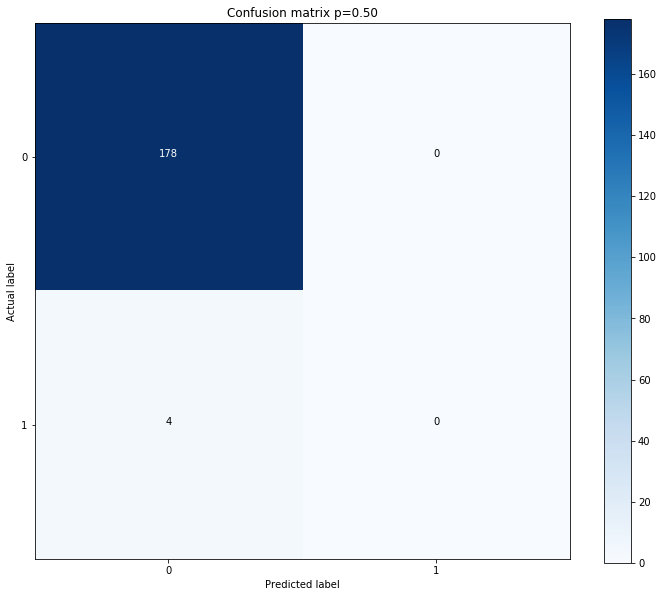

In [ ]:
cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))
train_experiment(cfg=cfg, experiment=cfg['TRAIN']['EXPERIMENT_TYPE'], save_weights=True, write_logs=True)



UsageError: Line magic function `%tensorboard` not found.


#Visualization 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import io
import os
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve
from skimage.segmentation import mark_boundaries

# Set some matplotlib parameters
mpl.rcParams['figure.figsize'] = (12, 10)

def plot_to_tensor():
    '''
    Converts a matplotlib figure to an image tensor
    :param figure: A matplotlib figure
    :return: Tensorflow tensor representing the matplotlib image
    '''
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    image_tensor = tf.image.decode_png(buf.getvalue(), channels=4)     # Convert .png buffer to tensorflow image
    image_tensor = tf.expand_dims(image_tensor, 0)     # Add the batch dimension
    return image_tensor

def plot_metrics(history, metrics, dir_path=None):
    '''
    Plot metrics for the training and validation sets over the training history.
    :param history: Model history; returned from model.fit()
    :param metrics: List of metrics to plot
    :param dir_path: Directory in which to save image
    '''
    plt.clf()
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,3,n+1)
        plt.plot(history.epoch,  history.history[metric], label='Train')    # Plot metric on training data
        plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')    # Plot metric on validation data
        plt.xlabel('Epoch')
        plt.ylabel(name)

        # Set plot limits depending on the metric
        if metric == 'loss':
          plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
          plt.ylim([0.8,1])
        else:
          plt.ylim([0,1])
        plt.legend()
    if dir_path is not None:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        plt.savefig(dir_path + 'metrics_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png')
    return

def plot_roc(name, labels, predictions, class_id=1, dir_path=None):
    '''
    Plots the ROC curve for predictions on a dataset
    :param name: Name of dataset on the plot
    :param labels: Ground truth labels
    :param predictions: Model predictions corresponding to the labels
    :param class_id: Index of class to consider
    :param dir_path: Directory in which to save image
    '''
    plt.clf()
    single_class_preds = predictions[:, class_id]    # Only care about one class
    single_class_labels = (np.array(labels) == class_id) * 1.0
    predictions = single_class_preds
    labels = single_class_labels
    fp, tp, _ = roc_curve(labels, predictions)  # Get values for true positive and true negative
    plt.plot(100*fp, 100*tp, label=name, linewidth=2)   # Plot the ROC curve
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-5,105])
    plt.ylim([-5,105])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    if dir_path is not None:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        plt.savefig(dir_path + 'ROC_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png')
    return plt

def plot_confusion_matrix(labels, predictions, class_id=1, dir_path=None):
    '''
    Plot a confusion matrix for the ground truth labels and corresponding model predictions for a particular class.
    :param labels: Ground truth labels
    :param predictions: Model predictions
    :param class_id: Index of class to consider
    :param dir_path: Directory in which to save image
    '''
    plt.clf()
    p = 1.0 / np.unique(labels).shape[0]
    single_class_preds = predictions[:, class_id]    # Only care about one class
    single_class_labels = (np.array(labels) == class_id) * 1.0
    predictions = single_class_preds
    labels = single_class_labels
    ax = plt.subplot()
    cm = confusion_matrix(labels, predictions > p)  # Calculate confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Plot confusion matrix
    ax.figure.colorbar(im, ax=ax)
    ax.set(yticks=[-0.5, 1.5], xticks=[0, 1], yticklabels=['0', '1'], xticklabels=['0', '1'])
    ax.yaxis.set_major_locator(mpl.ticker.IndexLocator(base=1, offset=0.5))

    # Print number of TPs, FPs, TNs, FNs on each quadrant in the plot
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    # Set plot's title and axis names
    plt.title('Confusion matrix p={:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Save the image
    if dir_path is not None:
        plt.savefig(dir_path + 'CM_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png')

    # Print these statistics
    print('True (-)ves: ', cm[0][0], '\nFalse (+)ves: ', cm[0][1], '\nFalse (-)ves: ', cm[1][0], '\nTrue (+)ves: ',
          cm[1][1])
    return plt


def visualize_explanation(orig_img, explanation, img_filename, label, probs, class_names, label_to_see='top', dir_path=None):
    '''
    Visualize an explanation for the prediction of a single X-ray image.
    :param orig_img: Original X-Ray image
    :param explanation: ImageExplanation object
    :param img_filename: Filename of the image explained
    :param label: Ground truth class of the example
    :param probs: Prediction probabilities
    :param class_names: Ordered list of class names
    :param label_to_see: Label to visualize in explanation
    :param dir_path: Path to directory where to save the generated image
    :return: Path to saved image
    '''

    # Plot original image on the left
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(orig_img)

    # Plot the image and its explanation on the right
    if label_to_see == 'top':
        label_to_see = explanation.top_labels[0]
    explanation.image = orig_img
    temp, mask = explanation.get_image_and_mask(label_to_see, positive_only=False, num_features=10,
                                                hide_rest=False)
    ax[1].imshow(mark_boundaries(temp, mask))

    # Display some information about the example
    pred_class = np.argmax(probs)
    fig.text(0.02, 0.8, "Prediction probabilities: " + str(['{:.2f}'.format(probs[i]) for i in range(len(probs))]),
             fontsize=10)
    fig.text(0.02, 0.82, "Predicted Class: " + str(pred_class) + ' (' + class_names[pred_class] + ')', fontsize=10)
    if label is not None:
        fig.text(0.02, 0.84, "Ground Truth Class: " + str(label) + ' (' + class_names[label] + ')', fontsize=10)
    fig.suptitle("LIME Explanation for image " + img_filename, fontsize=13)
    fig.tight_layout()

    # Save the image
    filename = None
    if dir_path is not None:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        filename = dir_path + img_filename.split('/')[-1] + '_exp_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png'
        plt.savefig(filename)
    return filename

def visualize_heatmap(orig_img, heatmap, img_filename, label, probs, class_names, dir_path=None):
    '''
    Obtain a comparison of an original image and heatmap produced by Grad-CAM.
    :param orig_img: Original X-Ray image
    :param heatmap: Heatmap generated by Grad-CAM.
    :param img_filename: Filename of the image explained
    :param label: Ground truth class of the example
    :param probs: Prediction probabilities
    :param class_names: Ordered list of class names
    :param dir_path: Path to save the generated image
    :return: Path to saved image
    '''

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(orig_img)
    ax[1].imshow(heatmap)

    # Display some information about the example
    pred_class = np.argmax(probs)
    fig.text(0.02, 0.8, "Prediction probabilities: " + str(['{:.2f}'.format(probs[i]) for i in range(len(probs))]),
             fontsize=10)
    fig.text(0.02, 0.82, "Predicted Class: " + str(pred_class) + ' (' + class_names[pred_class] + ')', fontsize=10)
    if label is not None:
        fig.text(0.02, 0.84, "Ground Truth Class: " + str(label) + ' (' + class_names[label] + ')', fontsize=10)
    fig.suptitle("Grad-CAM heatmap for image " + img_filename, fontsize=13)
    fig.tight_layout()

    # Save the image
    filename = None
    if dir_path is not None:
        filename = dir_path + img_filename.split('/')[-1] + '_gradcam_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.png'
        plt.savefig(filename)
    return filename

# Predict

In [ ]:
import pandas as pd
import yaml
import os
import dill
import cv2
import numpy as np
from tqdm import tqdm
from datetime import datetime
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from lime.wrappers.scikit_image import SegmentationAlgorithm
#from src.data.preprocess import remove_text
#from src.visualization.visualize import visualize_explanation


def predict_instance(x, model):
    '''
    Runs model prediction on 1 or more input images.
    :param x: Image(s) to predict
    :param model: A Keras model
    :return: A numpy array comprising a list of class probabilities for each prediction
    '''
    y = model.predict(x)  # Run prediction on the perturbations
    if y.shape[1] == 1:
        probs = np.concatenate([1.0 - y, y], axis=1)  # Compute class probabilities from the output of the model
    else:
        probs = y
    return probs


def predict_and_explain(x, model, exp, num_features, num_samples):
    '''
    Use the model to predict a single example and apply LIME to generate an explanation.
    :param x: Preprocessed image to predict
    :param model: The trained neural network model
    :param exp: A LimeImageExplainer object
    :param num_features: # of features to use in explanation
    :param num_samples: # of times to perturb the example to be explained
    :return: The LIME explainer for the instance
    '''

    def predict(x):
        '''
        Helper function for LIME explainer. Runs model prediction on perturbations of the example.
        :param x: List of perturbed examples from an example
        :return: A numpy array constituting a list of class probabilities for each predicted perturbation
        '''
        probs = predict_instance(x, model)
        return probs

    # Algorithm for superpixel segmentation. Parameters set to limit size of superpixels and promote border smoothness
    segmentation_fn = SegmentationAlgorithm('quickshift', kernel_size=2.25, max_dist=50, ratio=0.1, sigma=0.15)

    # Generate explanation for the example
    explanation = exp.explain_instance(x, predict, num_features=num_features, num_samples=num_samples, segmentation_fn=segmentation_fn)
    probs = predict_instance(np.expand_dims(x, axis=0), model)
    return explanation, probs


def predict_and_explain_set(raw_img_dir=None, preds_dir=None, save_results=True, give_explanations=True):
    '''
    Preprocess a raw dataset. Then get model predictions and corresponding explanations.
    :param raw_img_dir: Directory in which to look for raw images
    :param preds_dir: Path at which to save results of this prediction
    :param save_results: Flag specifying whether to save the prediction results to disk
    :param give_explanations: Flag specifying whether to provide LIME explanations with predictions spreadsheet
    :return: Dataframe of prediction results, optionally including explanations.
    '''

    # Load project config data
    cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))
    cur_date = datetime.now().strftime('%Y%m%d-%H%M%S')

    # Restore the model, LIME explainer, and model class indices from their respective serializations
    model = load_model(cfg['PATHS']['MODEL_TO_LOAD'], compile=False)
    explainer = dill.load(open(cfg['PATHS']['LIME_EXPLAINER'], 'rb'))
    class_indices = dill.load(open(cfg['PATHS']['OUTPUT_CLASS_INDICES'], 'rb'))

    # Load LIME and prediction constants from config
    NUM_SAMPLES = cfg['LIME']['NUM_SAMPLES']
    NUM_FEATURES = cfg['LIME']['NUM_FEATURES']
    CLASS_NAMES = cfg['DATA']['CLASSES']

    # Define column names of the DataFrame representing the prediction results
    col_names = ['Image Filename', 'Predicted Class']
    for c in cfg['DATA']['CLASSES']:
        col_names.append('p(' + c + ')')

    # Add columns for client explanation
    if give_explanations:
        col_names.append('Explanation Filename')

    # Set raw image directory based on project config, if not specified
    if raw_img_dir is None:
        raw_img_dir = cfg['PATHS']['BATCH_PRED_IMGS']

    # If no path is specified, create new directory for predictions
    if preds_dir is None:
        preds_dir = cfg['PATHS']['BATCH_PREDS'] + '\\' + cur_date + '\\'
        if save_results and not os.path.exists(cfg['PATHS']['BATCH_PREDS'] + '\\' + cur_date):
            os.mkdir(preds_dir)

    # Create DataFrame for raw image file names
    raw_img_df = pd.DataFrame({'filename': os.listdir(raw_img_dir)})
    raw_img_df = raw_img_df[raw_img_df['filename'].str.contains('jpg|png|jpeg', na=False)]   # Enforce image files

    # Create generator for the image files
    img_gen = ImageDataGenerator(preprocessing_function=remove_text, samplewise_std_normalization=True,
                                 samplewise_center=True)
    img_iter = img_gen.flow_from_dataframe(dataframe=raw_img_df, directory=raw_img_dir, x_col="filename",
                                           target_size=cfg['DATA']['IMG_DIM'], batch_size=1, class_mode=None,
                                           shuffle=False)

    # Predict (and optionally explain) all images in the specified directory
    rows = []
    print('Predicting and explaining examples.')

    for filename in raw_img_df['filename'].tolist():

        # Get preprocessed image and make a prediction.
        try:
            x = img_iter.next()
        except StopIteration:
            break
        y = np.squeeze(predict_instance(x, model))

        # Rearrange prediction probability vector to reflect original ordering of classes in project config
        p = [y[CLASS_NAMES.index(c)] for c in class_indices]
        predicted_class = CLASS_NAMES[np.argmax(p)]
        row = [filename, predicted_class]
        row.extend(list(p))

        # Explain this prediction
        if give_explanations:
            explanation, _ = predict_and_explain(np.squeeze(x, axis=0), model, explainer, NUM_FEATURES, NUM_SAMPLES)
            if cfg['LIME']['COVID_ONLY'] == True:
                label_to_see = class_indices['COVID-19']
            else:
                label_to_see = 'top'

            # Load and resize the corresponding original image (no preprocessing)
            orig_img = cv2.imread(raw_img_dir + filename)
            orig_img = cv2.resize(orig_img, tuple(cfg['DATA']['IMG_DIM']), interpolation=cv2.INTER_NEAREST)

            # Generate visual for explanation
            exp_filename = visualize_explanation(orig_img, explanation, filename, None, p, CLASS_NAMES,
                                                 label_to_see=label_to_see, file_path=preds_dir)
            row.append(exp_filename.split('\\')[-1])
        rows.append(row)

    # Convert results to a Pandas DataFrame and save
    results_df = pd.DataFrame(rows, columns=col_names)
    if save_results:
        results_path = preds_dir + 'predictions.csv'
        results_df.to_csv(results_path, columns=col_names, index_label=False, index=False)
    return results_df


#if __name__ == '__main__':
#    results = predict_and_explain_set(preds_dir=None, save_results=True, give_explanations=True)

# Explainability 



## LIME (Local Interpretable Model-Agnostic Explanations)

In [ ]:
%pip install lime

     |████████████████████████████████| 276kB 15.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=9fbc0ccf40056e2a37e50720d9bedb4e9087b03c04d44b5a82d6f3fc349934a4
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


### LIME Implementation 

In [ ]:
from lime.lime_image import *
import pandas as pd
import yaml
import os
import datetime
import dill
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from src.visualization.visualize import visualize_explanation
#from src.predict import predict_instance, predict_and_explain
#from src.data.preprocess import remove_text


def setup_lime():
    '''
    Load relevant information and create a LIME Explainer
    :return: dict containing important information and objects for explanation experiments
    '''

    # Load relevant constants from project config file
    cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))
    lime_dict = {}
    lime_dict['NUM_SAMPLES'] = cfg['LIME']['NUM_SAMPLES']
    lime_dict['NUM_FEATURES'] = cfg['LIME']['NUM_FEATURES']
    lime_dict['IMG_PATH'] = cfg['PATHS']['IMAGES']
    lime_dict['RAW_DATA_PATH'] = cfg['PATHS']['RAW_DATA']
    lime_dict['IMG_DIM'] = cfg['DATA']['IMG_DIM']
    lime_dict['PRED_THRESHOLD'] = cfg['PREDICTION']['THRESHOLD']
    lime_dict['CLASSES'] = cfg['DATA']['CLASSES']
    lime_dict['CLASS_MODE'] = cfg['TRAIN']['CLASS_MODE']
    lime_dict['COVID_ONLY'] = cfg['LIME']['COVID_ONLY']
    KERNEL_WIDTH = cfg['LIME']['KERNEL_WIDTH']
    FEATURE_SELECTION = cfg['LIME']['FEATURE_SELECTION']

    # Load train and test sets
    lime_dict['TRAIN_SET'] = pd.read_csv(cfg['PATHS']['TRAIN_SET'])
    lime_dict['TEST_SET'] = pd.read_csv(cfg['PATHS']['TEST_SET'])

    # Create ImageDataGenerator for test set
    test_img_gen = ImageDataGenerator(preprocessing_function=remove_text,
                                       samplewise_std_normalization=True, samplewise_center=True)
    test_generator = test_img_gen.flow_from_dataframe(dataframe=lime_dict['TEST_SET'], directory=cfg['PATHS']['RAW_DATA'],
        x_col="filename", y_col='label_str', target_size=tuple(cfg['DATA']['IMG_DIM']), batch_size=1,
        class_mode='categorical', validate_filenames=False, shuffle=False)
    lime_dict['TEST_GENERATOR'] = test_generator

    # Define the LIME explainer
    lime_dict['EXPLAINER'] = LimeImageExplainer(kernel_width=KERNEL_WIDTH, feature_selection=FEATURE_SELECTION,
                                                verbose=True)
    dill.dump(lime_dict['EXPLAINER'], open(cfg['PATHS']['LIME_EXPLAINER'], 'wb'))    # Serialize the explainer

    # Load trained model's weights
    lime_dict['MODEL'] = load_model(cfg['PATHS']['MODEL_TO_LOAD'], compile=False)

    return lime_dict


def explain_xray(lime_dict, idx, save_exp=True):
    '''
    Make a prediction and provide a LIME explanation
    :param lime_dict: dict containing important information and objects for explanation experiments
    :param idx: index of image in test set to explain
    :param save_exp: Boolean indicating whether to save the explanation visualization
    '''

    # Get i'th preprocessed image in test set
    lime_dict['TEST_GENERATOR'].reset()
    for i in range(idx + 1):
        x, y = lime_dict['TEST_GENERATOR'].next()
    x = np.squeeze(x, axis=0)

    # Get the corresponding original image (no preprocessing)
    orig_img = cv2.imread(lime_dict['RAW_DATA_PATH'] + lime_dict['TEST_SET']['filename'][idx])
    new_dim = tuple(lime_dict['IMG_DIM'])
    orig_img = cv2.resize(orig_img, new_dim, interpolation=cv2.INTER_NEAREST)     # Resize image

    # Make a prediction for this image and retrieve a LIME explanation for the prediction
    start_time = datetime.datetime.now()
    explanation, probs = predict_and_explain(x, lime_dict['MODEL'], lime_dict['EXPLAINER'],
                                      lime_dict['NUM_FEATURES'], lime_dict['NUM_SAMPLES'])
    print("Explanation time = " + str((datetime.datetime.now() - start_time).total_seconds()) + " seconds")


    # Get image filename and label
    img_filename = lime_dict['TEST_SET']['filename'][idx]
    label = lime_dict['TEST_SET']['label'][idx]

    # Rearrange prediction probability vector to reflect original ordering of classes in project config
    probs = [probs[0][lime_dict['CLASSES'].index(c)] for c in lime_dict['TEST_GENERATOR'].class_indices]

    # Visualize the LIME explanation and optionally save it to disk
    if save_exp:
        file_path = lime_dict['IMG_PATH']
    else:
        file_path = None
    if lime_dict['COVID_ONLY'] == True:
        label_to_see = lime_dict['TEST_GENERATOR'].class_indices['COVID-19']
    else:
        label_to_see = 'top'
    _ = visualize_explanation(orig_img, explanation, img_filename, label, probs, lime_dict['CLASSES'], label_to_see=label_to_see,
                          dir_path=file_path)
    return


#if __name__ == '__main__':
#    lime_dict = setup_lime()
#    i = 0                                                       # Select i'th image in test set
#    explain_xray(lime_dict, i, save_exp=True)                   # Generate explanation for image

### LIME Results

/content/gdrive/Shareddrives/Covid-CXR/covid-cxr
Found 182 non-validated image filenames belonging to 2 classes.


Intercept -4.3518151143945855e-05
Prediction_local [8.36334522e-05]
Right: 0.00020971664
Intercept 1.0000435268692476
Prediction_local [0.99991635]
Right: 0.99979025
Explanation time = 13.634404 seconds


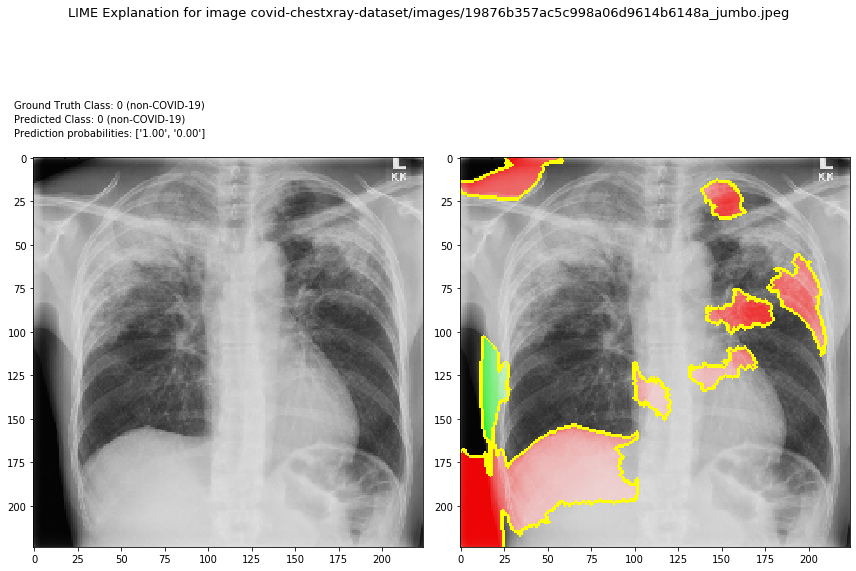

In [ ]:
%cd /content/gdrive/Shareddrives/Covid-CXR/covid-cxr

lime_dict = setup_lime()
i = 0                                                       # Select i'th image in test set
explain_xray(lime_dict, i, save_exp=True)                   # Generate explanation for image

/content/gdrive/Shareddrives/Covid-CXR/covid-cxr
Found 182 non-validated image filenames belonging to 2 classes.


Intercept -0.00015584123787216892
Prediction_local [0.00020818]
Right: 0.0009866562
Intercept 1.0001558526790586
Prediction_local [0.99979181]
Right: 0.9990133
Explanation time = 13.623751 seconds


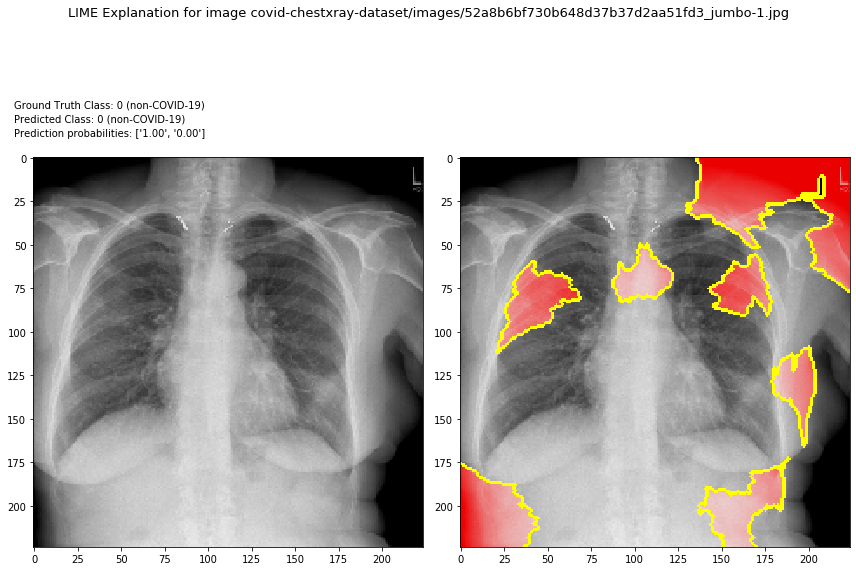

In [ ]:
%cd /content/gdrive/Shareddrives/Covid-CXR/covid-cxr

lime_dict = setup_lime()
i =  3                                                      # Select i'th image in test set
explain_xray(lime_dict, i, save_exp=True)                   # Generate explanation for image

Intercept -0.017733383504657405
Prediction_local [0.1029438]
Right: 0.11352224
Intercept 1.0177333804903619
Prediction_local [0.89705621]
Right: 0.88647777
Explanation time = 7.144256 seconds


Intercept 6.668503610646843e-08
Prediction_local [-4.35935137e-08]
Right: 2.1472818e-10
Intercept 0.9999999690830006
Prediction_local [1.00000003]
Right: 1.0
Explanation time = 7.253349 seconds


Intercept -2.2390679865451328e-05
Prediction_local [6.02831719e-05]
Right: 0.00012129527
Intercept 1.0000223928957255
Prediction_local [0.99993971]
Right: 0.99987864
Explanation time = 6.647923 seconds


Intercept 4.258325879885161e-05
Prediction_local [-1.18316818e-05]
Right: 2.5840845e-06
Intercept 0.9999574255190647
Prediction_local [1.00001182]
Right: 0.9999974
Explanation time = 7.321352 seconds


Intercept -0.0014724623116744804
Prediction_local [0.00230256]
Right: 0.006897655
Intercept 1.0014724602580403
Prediction_local [0.99769744]
Right: 0.9931023
Explanation time = 7.612809 seconds


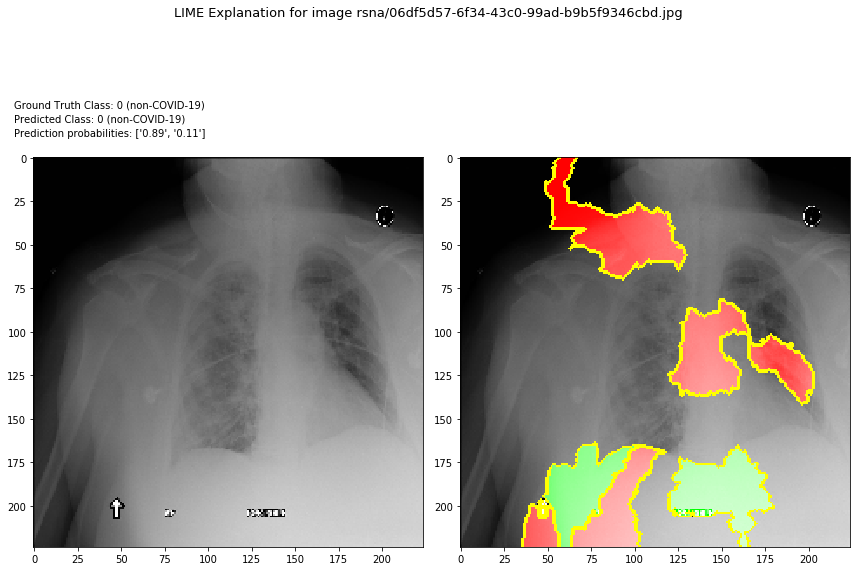

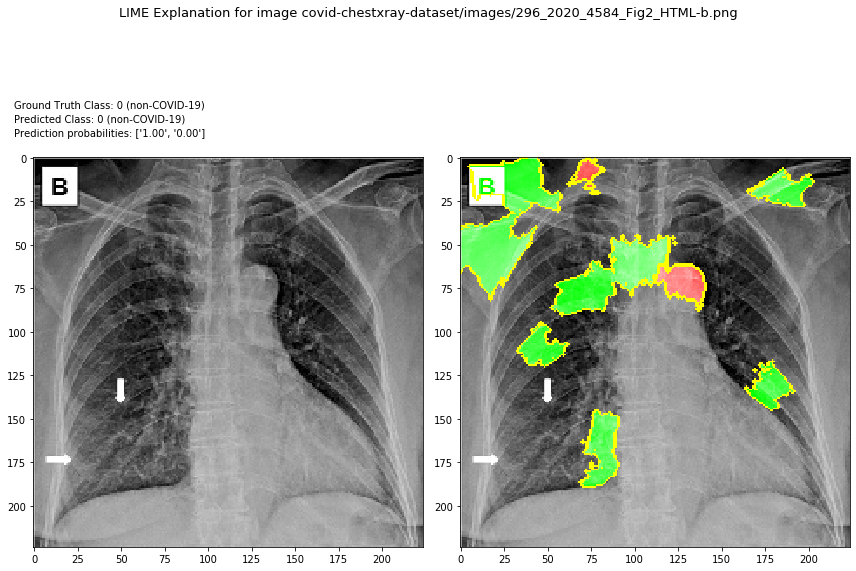

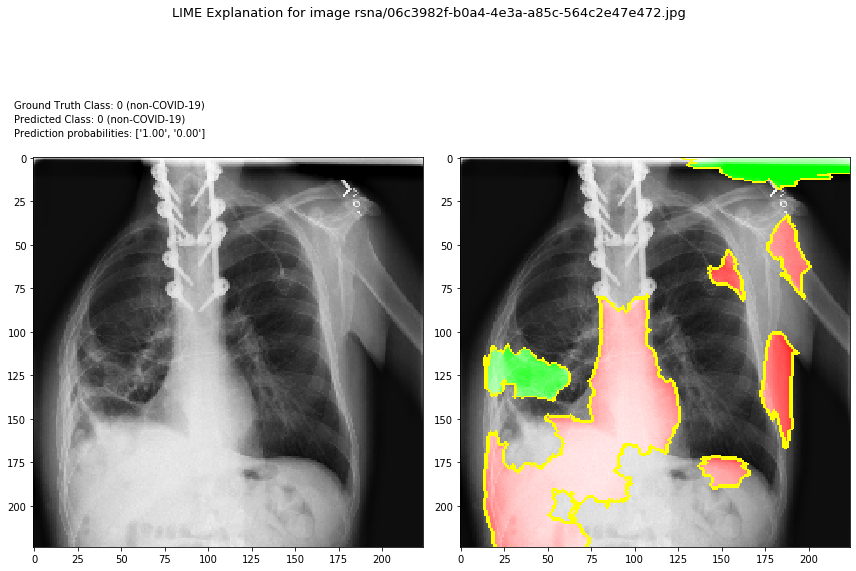

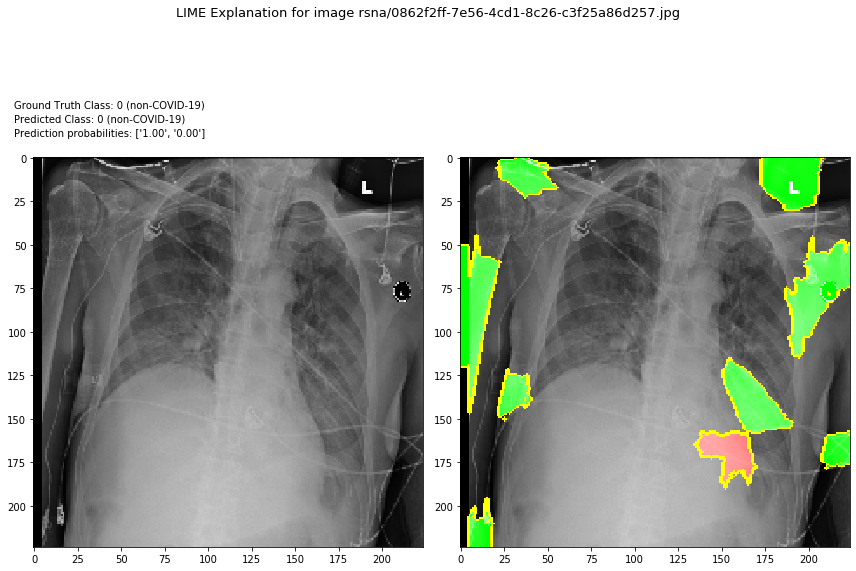

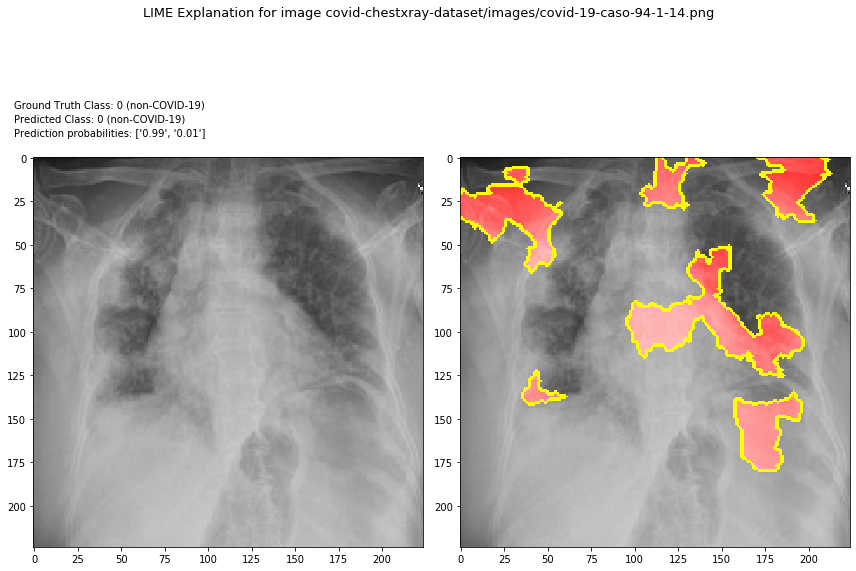

In [ ]:
#%cd /content/gdrive/Shareddrives/Covid-CXR/covid-cxr

#lime_dict = setup_lime()
for i in range(20,25):
                                                         # Select i'th image in test set
  explain_xray(lime_dict, i, save_exp=True)                   # Generate explanation for image

## Grad-CAM 

### Grad-CAM Implementation

In [ ]:
import yaml
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from src.data.preprocess import remove_text
from src.predict import predict_instance
from src.visualization.visualize import visualize_heatmap

def setup_gradcam():
    '''
    Load relevant variables to apply Grad-CAM
    :return: dict containing important information and objects for Grad-CAM visualizations
    '''

    cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))
    setup_dict = {}

    setup_dict['MODEL'] = load_model(cfg['PATHS']['MODEL_TO_LOAD'], compile=False)
    setup_dict['MODEL'].summary()

    # Get name of final convolutional layer
    layer_name = ''
    for layer in setup_dict['MODEL'].layers:
        if any('Conv2D' in l for l in layer._keras_api_names):
            layer_name = layer.name
    setup_dict['LAYER_NAME'] = layer_name

    setup_dict['IMG_PATH'] = cfg['PATHS']['IMAGES']
    setup_dict['RAW_DATA_PATH'] = cfg['PATHS']['RAW_DATA']
    setup_dict['TEST_SET'] = pd.read_csv(cfg['PATHS']['TEST_SET'])
    setup_dict['IMG_DIM'] = cfg['DATA']['IMG_DIM']
    setup_dict['CLASSES'] = cfg['DATA']['CLASSES']

    # Create ImageDataGenerator for test set
    test_img_gen = ImageDataGenerator(preprocessing_function=remove_text,
                                       samplewise_std_normalization=True, samplewise_center=True)
    test_generator = test_img_gen.flow_from_dataframe(dataframe=setup_dict['TEST_SET'],
                                                      directory=cfg['PATHS']['RAW_DATA'],
                                                      x_col="filename", y_col='label_str',
                                                      target_size=tuple(cfg['DATA']['IMG_DIM']), batch_size=1,
                                                      class_mode='categorical', validate_filenames=False, shuffle=False)
    setup_dict['TEST_GENERATOR'] = test_generator
    return setup_dict

def apply_gradcam(setup_dict, idx, hm_intensity=0.5, save_hm=True):
    '''
    Make a prediction and overlay a heatmap depicting the gradient of the predicted class with respect to the output of
    a layer of the model.
    :param setup_dict: dict containing important information and objects for Grad-CAM
    :param idx: index of image in test set to explain
    :param save_hm: Boolean indicating whether to save the heatmap visualization
    '''

    # Get i'th preprocessed image in test set
    setup_dict['TEST_GENERATOR'].reset()
    for i in range(idx + 1):
        x, y = setup_dict['TEST_GENERATOR'].next()

    # Get the corresponding original image (no preprocessing)
    orig_img = cv2.imread(setup_dict['RAW_DATA_PATH'] + setup_dict['TEST_SET']['filename'][idx])
    new_dim = tuple(setup_dict['IMG_DIM'])
    orig_img = cv2.resize(orig_img, new_dim, interpolation=cv2.INTER_NEAREST)     # Resize image

    # Predict this example
    probs = predict_instance(x, setup_dict['MODEL'])

    # Rearrange prediction probability vector to reflect original ordering of classes in project config
    probs = [probs[0][setup_dict['CLASSES'].index(c)] for c in setup_dict['TEST_GENERATOR'].class_indices]

    with tf.GradientTape() as tape:
        last_conv_layer = setup_dict['MODEL'].get_layer(setup_dict['LAYER_NAME'])
        iterate = Model([setup_dict['MODEL'].inputs], [setup_dict['MODEL'].output, last_conv_layer.output])
        model_out, last_conv_layer = iterate(x)
        class_out = model_out[:, np.argmax(model_out[0])]
        grads = tape.gradient(class_out, last_conv_layer)
        pooled_grads = tf.keras.backend.mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
    heatmap = np.maximum(heatmap, 0.0)    # Equivalent of passing through ReLU
    heatmap /= np.max(heatmap)
    heatmap = heatmap.squeeze(axis=0)
    heatmap = cv2.resize(heatmap, tuple(setup_dict['IMG_DIM']))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_img = cv2.addWeighted(heatmap, hm_intensity, orig_img, 1.0 - hm_intensity, 0)

    # Visualize the Grad-CAM heatmap and optionally save it to disk
    if save_hm:
        file_path = setup_dict['IMG_PATH']
    else:
        file_path = None
    img_filename = setup_dict['TEST_SET']['filename'][idx]
    label = setup_dict['TEST_SET']['label'][idx]
    _ = visualize_heatmap(orig_img, heatmap_img, img_filename, label, probs, setup_dict['CLASSES'],
                              dir_path=file_path)
    return heatmap



### Grad-CAM Results

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv0_0 (Conv2D)                (None, 224, 224, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 224, 224, 16) 64          conv0_0[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_14 (LeakyReLU)      (None, 224, 224, 16) 0           batch_normalization_12[0][0]     
____________________________________________________________________________________________

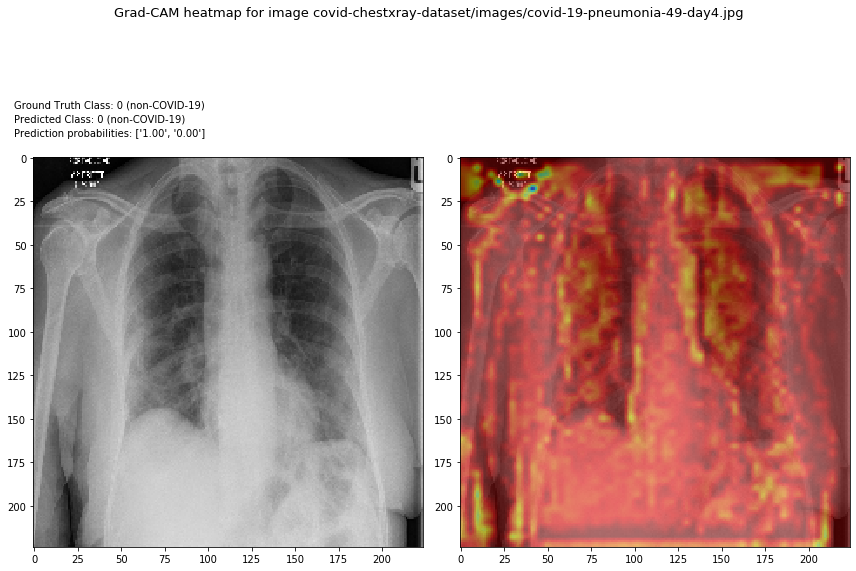

In [ ]:
setup_dict = setup_gradcam()

heatmap = apply_gradcam(setup_dict, 10, hm_intensity=0.5, save_hm=True)    # Generate heatmap for image

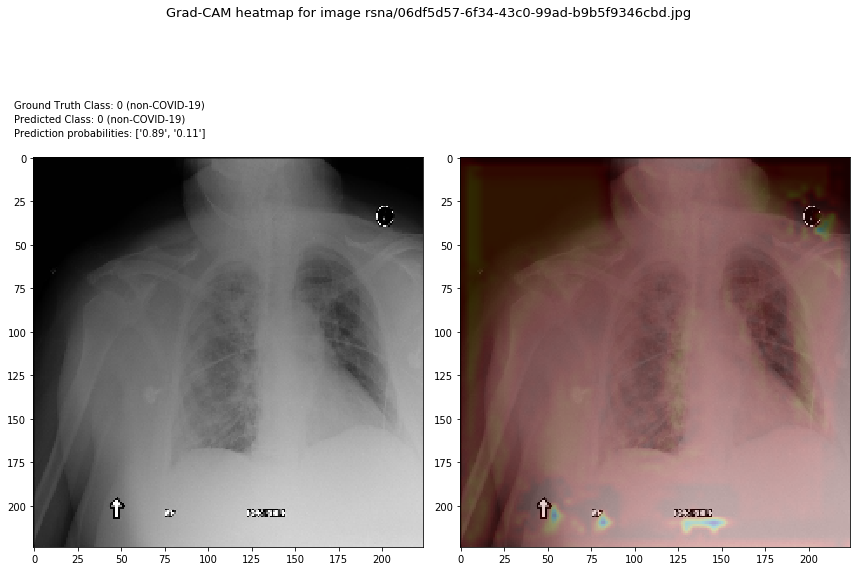

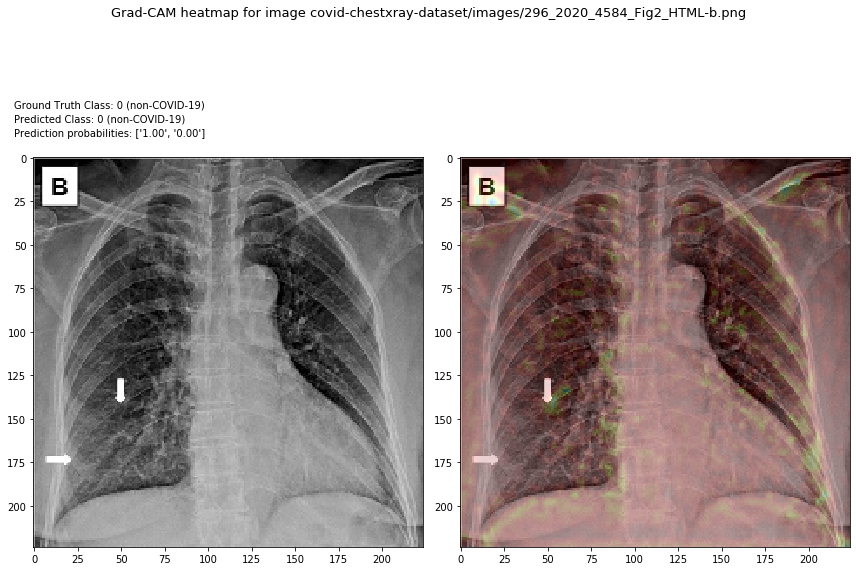

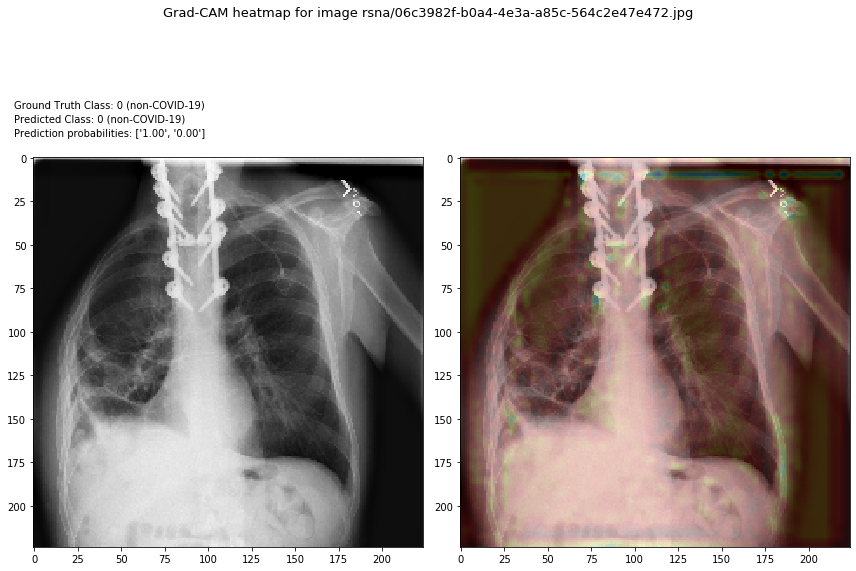

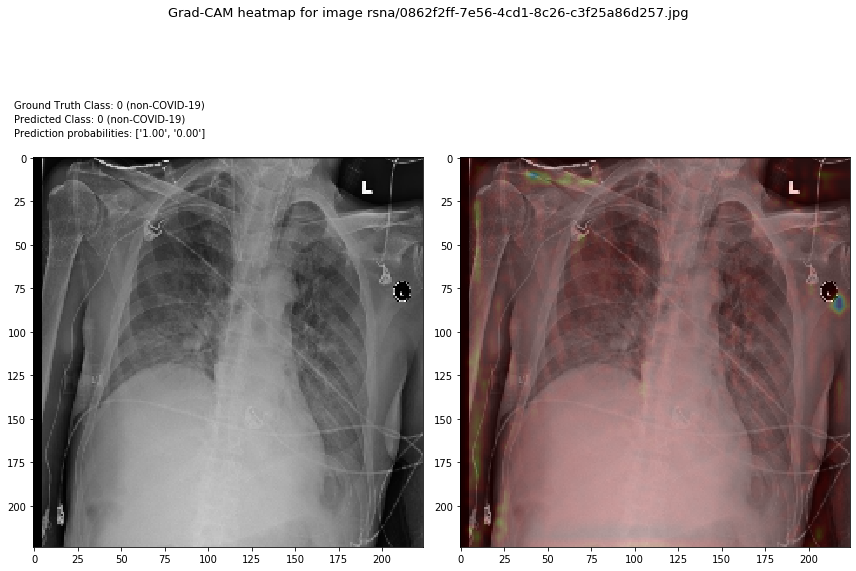

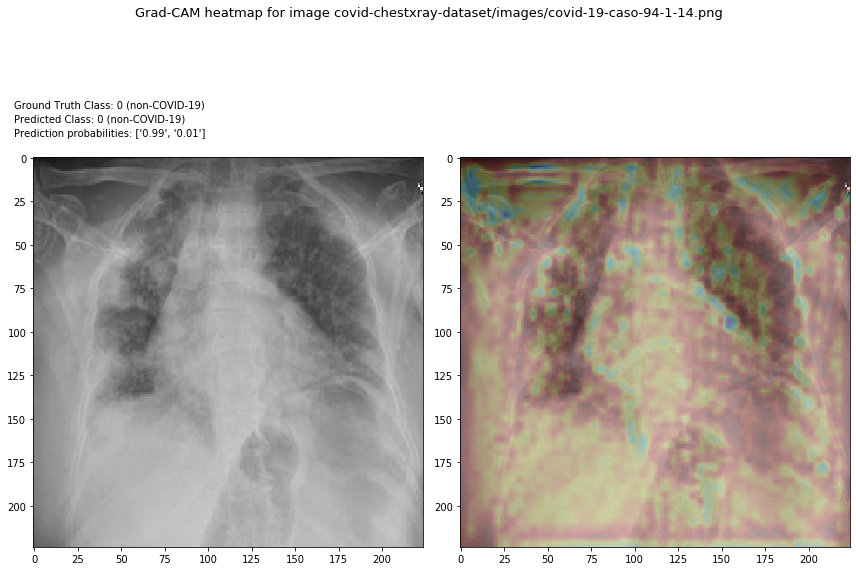

In [ ]:
for i in range(20,25):

  heatmap = apply_gradcam(setup_dict, i, hm_intensity=.18, save_hm=False)    # Generate heatmap for image

# SHAP

In [ ]:
%pip install shap

     |████████████████████████████████| 327kB 14.2MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463915 sha256=930627d9a9b3bef27acf710c3ac3e284951b901c64626e1d9b633ad6c6f747ca
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


##SHAP Implementation

In [ ]:
import shap
import numpy as np

%cd /content/gdrive/Shareddrives/Covid-CXR/covid-cxr

cfg = yaml.full_load(open(os.getcwd() + "/config.yml", 'r'))

lime_dict = setup_lime()

# Background examples to take an expectationi over

x_train = lime_dict['TRAIN_SET'] = pd.read_csv(cfg['PATHS']['TRAIN_SET'])

background = x_train[np.random.choice(x_train.shape[0], 10, replace=False)]

# Use SHAP DeepLIFT to explain predictions of the model on some images

model = load_model(cfg['PATHS']['MODEL_TO_LOAD'], compile=False)

e = shap.DeepExplainer(model, background)

# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])



   

   

    

  

/content/gdrive/Shareddrives/Covid-CXR/covid-cxr
Found 182 non-validated image filenames belonging to 2 classes.


KeyError: ignored